In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
from itertools import chain
style.use('ggplot')
%matplotlib inline

In [2]:
# This dataset has some predefined classes in it just to show how our algorithm can use this information
# whether we know or not to classify new data points
dataset = {'g':[[2, 2], [2, 4], [4, 3], [3, 4]], 'r':[[6, 6], [7, 8], [7, 7], [8, 7]]}
new_data = [[5, 5], [5, 8], [3, 3]]

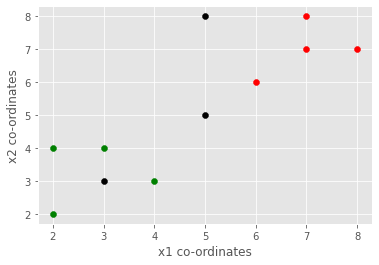

In [3]:
[[plt.scatter(ii[0], ii[1], c=cat) for ii in dataset[cat] ] for cat in dataset] # Training data
[plt.scatter(ii[0], ii[1], color='black') for ii  in new_data] # Testing data in black
plt.xlabel('x1 co-ordinates')
plt.ylabel('x2 co-ordinates')
plt.show()

In [4]:
class KNN:
    
    def __init__(self, k=3, distance_metric="Euclidean"):
        self.k = k
        self.distance_metric = "Euclidean"
        
        
    def __distance(self, x, y):
        if(self.distance_metric=="Euclidean"):
            return np.linalg.norm((np.array(x)-np.array(y)))
        elif(self.distance_metric == "Manhattan"):
            return np.linalg.norm((np.array(x)-np.array(y)), 1)
        else:
            print("Please enter a valid distance metric")
            return -99999
        
        
    def __calc_all_dist(self, data, point):
        dists = []
        [[dists.append([ self.__distance(ii, point), cat]) for ii in data[cat]] for cat in data]
        return dists
        
        
    def __calc_votes(self, data, point):
        distances = self.__calc_all_dist(data, point)
        votes = [i[1] for i in sorted(distances)[:self.k]]
        return Counter(votes).most_common(1)[0][0] # We want to find the (1st) most common category in this list containing the k nearest neighbors
        
    def predict(self, data, predict, test_size=0.2): # The data to be used for calculating the distance metric and the data whose category is to be predicted
        
        if(len(data) > self.k):
            warnings.warn("The total number of categories in your data is greater than the k value!")
        
        return [self.__calc_votes(data, point) for point in predict]

Now there are a few distance metrics that can be used for calculating the distance between the data points. Thus, it is important to know which metric is used in which conditions. An extract from the paper, “On the Surprising Behavior of Distance Metrics in High Dimensional Space”, by Charu C. Aggarwal, Alexander Hinneburg, and Daniel A. Kiem.
##### "for a given problem with a fixed (high) value of the dimensionality d, it may be preferable to use lower values of p. This means that the L1 distance metric (Manhattan Distance metric) is the most preferable for high dimensional applications."


<div>
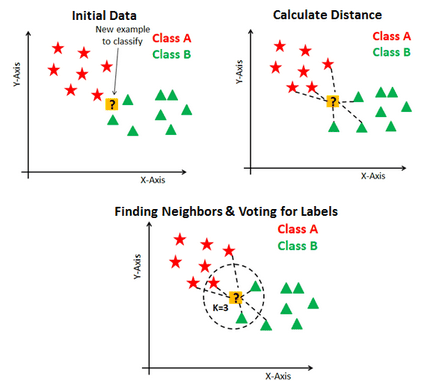
</div>

Source: [Data Driven Investor](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnztgEM1a6su0qUN77MsFo17ahgxZi-CfcXQ&usqp=CAU)

In [5]:
KNN_model = KNN(3, "Euclidean")

In [6]:
result = KNN_model.predict(dataset, new_data)
print(result)

['g', 'r', 'g']


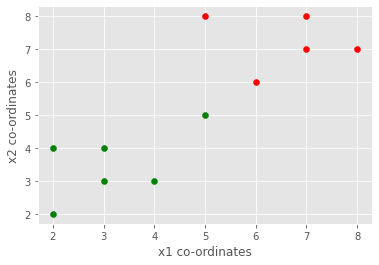

In [7]:
[[plt.scatter(ii[0], ii[1], c=cat) for ii in dataset[cat] ] for cat in dataset] # Training data

[plt.scatter(new_data[i][0], new_data[i][1], color=result[i]) for i in range(len(result))]

plt.xlabel('x1 co-ordinates')
plt.ylabel('x2 co-ordinates')
plt.show()